In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data (1).csv')

In [3]:
df.drop(columns='Unnamed: 32', inplace=True)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
df.drop(columns='id', inplace = True)

In [9]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
scaler = MinMaxScaler()
X_normalized_scaled = scaler.fit_transform(X_normalized)
k_best = 5
selector = SelectKBest(score_func=chi2, k=k_best)
X_selected = selector.fit_transform(X_normalized_scaled, y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, test_size=0.2)

In [13]:
#Hyper paramater Tuning
from sklearn.metrics import silhouette_score


n_clusters_range = [2, 3, 4, 5, 6]
metric_options = ['euclidean']
linkage_options = ['ward']

best_score = -1
best_params = {}

for n_clusters in n_clusters_range:
    for metric in metric_options:
        for linkage in linkage_options:
            
            AggClusteringModel = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            
            
            labels = AggClusteringModel.fit_predict(X_train)
            score = silhouette_score(X_train, labels)
            
            
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'metric': metric, 'linkage': linkage}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


Best parameters: {'n_clusters': 2, 'metric': 'euclidean', 'linkage': 'ward'}
Best silhouette score: 0.5877666618234166


In [14]:
AggClusteringModel = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

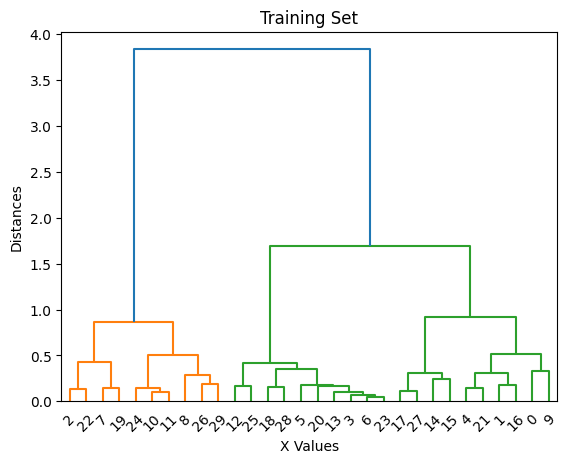

In [15]:
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

#draw the Hierarchical graph for Training set
dendrogram = sch.dendrogram(sch.linkage(X_train[:30, :], method='ward'))  # Using NumPy indexing
plt.title('Training Set')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()

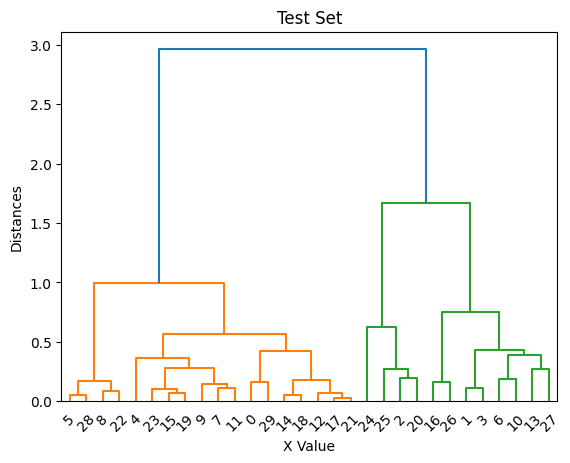

In [16]:
#draw the Hierarchical graph for Test set
dendrogram = sch.dendrogram(sch.linkage(X_test[:30, :], method = 'ward'))# it can be complete,average,single
plt.title('Test Set')
plt.xlabel('X Value')
plt.ylabel('Distances')
plt.show()

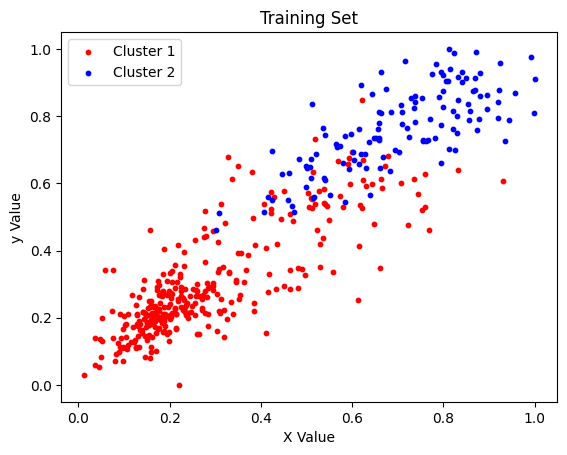

In [17]:
# Draw the Scatter for Train set
plt.scatter(X_train[y_pred_train == 0, 0], X_train[y_pred_train == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X_train[y_pred_train == 1, 0], X_train[y_pred_train == 1, 1], s=10, c='blue', label='Cluster 2')


plt.title('Training Set')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.show()


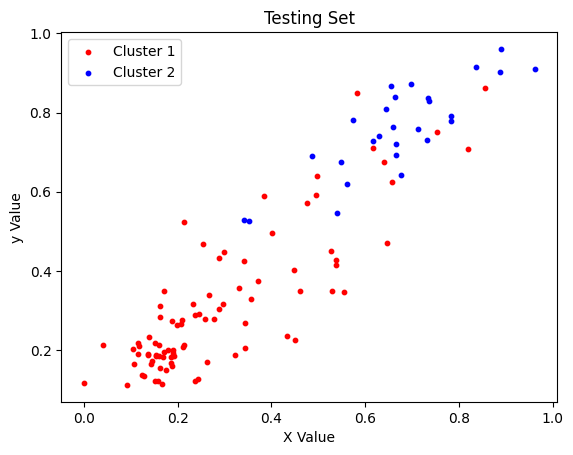

In [18]:
# Draw the Scatter for Test set
plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], s=10, c='blue', label='Cluster 2')

plt.title('Testing Set')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.show()


In [19]:
import numpy as np

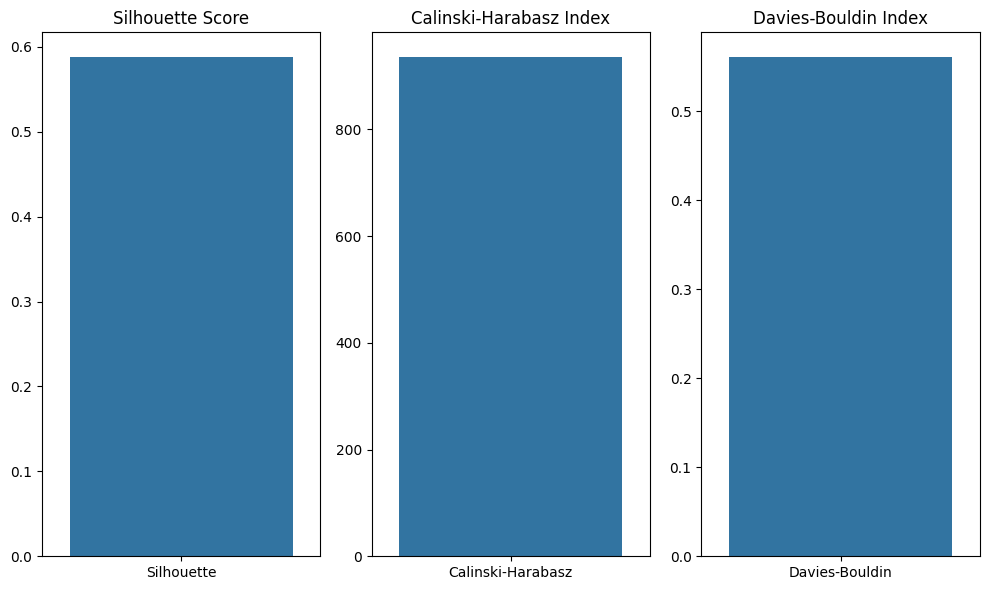

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X_train, y_pred_train)
calinski_harabasz = calinski_harabasz_score(X_train, y_pred_train)
davies_bouldin = davies_bouldin_score(X_train, y_pred_train)

# Plotting the metrics
plt.figure(figsize=(10, 6))

# Silhouette score
plt.subplot(1, 3, 1)
sns.barplot(x=['Silhouette'], y=[silhouette])
plt.title('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
sns.barplot(x=['Calinski-Harabasz'], y=[calinski_harabasz])
plt.title('Calinski-Harabasz Index')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
sns.barplot(x=['Davies-Bouldin'], y=[davies_bouldin])
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()